In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("All ML libraries loaded successfully!")

All ML libraries loaded successfully!


In [2]:
import pandas as pd

In [3]:
import os
os.getcwd()

'C:\\Users\\lenovo'

In [4]:
os.listdir()

['.android',
 '.cache',
 '.cargo',
 '.eclipse',
 '.git',
 '.git-for-windows-updater',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.nbi',
 '.node_repl_history',
 '.p2',
 '.rustup',
 '.vscode',
 '3D Objects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Dataset .csv',
 'Desktop',
 'dhaksha.ipynb',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'hi.ipynb',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'newJavaFile.java',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo'

In [5]:
df = pd.read_csv("Dataset .csv")

In [6]:
print(df.head())
print(df.info())
print(df.describe())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df = df.drop(['Restaurant ID', 'Address', 'Locality Verbose'], axis=1)
df = df.dropna()


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Locality              9542 non-null   object 
 4   Longitude             9542 non-null   float64
 5   Latitude              9542 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9542 non-null   int64  
 8   Currency              9542 non-null   object 
 9   Has Table booking     9542 non-null   object 
 10  Has Online delivery   9542 non-null   object 
 11  Is delivering now     9542 non-null   object 
 12  Switch to order menu  9542 non-null   object 
 13  Price range           9542 non-null   int64  
 14  Aggregate rating      9542 non-null   float64
 15  Rating color          9542

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Restaurant Name'] = le.fit_transform(df['Restaurant Name'])
df['City'] = le.fit_transform(df['City'])
df['Locality'] = le.fit_transform(df['Locality'])


In [11]:
df.head()


,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3742,162,73,171,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,3167,162,73,592,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2892,162,75,308,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,4700,162,75,860,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,5515,162,75,860,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


In [14]:
print(X.shape)
print(y.shape)


(9542, 17)
(9542,)


In [15]:
print(X.head())  # To check the features
print(y.head())  # To check the target variable


   Restaurant Name  Country Code  City  Locality   Longitude   Latitude  \
0             3742           162    73       171  121.027535  14.565443   
1             3167           162    73       592  121.014101  14.553708   
2             2892           162    75       308  121.056831  14.581404   
3             4700           162    75       860  121.056475  14.585318   
4             5515           162    75       860  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0            

In [16]:
print(X.columns)


Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [17]:
print(X.isnull().sum())  # Check missing values in features
print(y.isnull().sum())  # Check missing values in target variable


Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(7633, 17) (1909, 17)
(7633,) (1909,)


In [20]:
print(X_train.head())  # Preview the training features
print(X_test.head())   # Preview the test features
print(y_train.head())  # Preview the training target variable
print(y_test.head())   # Preview the test target variable


      Restaurant Name  Country Code  City  Locality  Longitude   Latitude  \
8177             7106             1    88       597  77.353663  28.574219   
6401             2096             1    87       812  77.134360  28.671141   
81               5490            30   120      1152 -46.746958 -23.609207   
1332             5667             1    50       252  77.086080  28.482318   
9041             6098             1    88      1012  77.339801  28.586405   

                                      Cuisines  Average Cost for two  \
8177                              South Indian                   450   
6401                          Pizza, Fast Food                   700   
81                           Lebanese, Arabian                   120   
1332                                   Mughlai                   300   
9041  American, Fast Food, Salad, Healthy Food                   500   

                Currency Has Table booking Has Online delivery  \
8177  Indian Rupees(Rs.)              

In [21]:
print(X_train.isnull().sum())  # Check missing values in training features
print(X_test.isnull().sum())   # Check missing values in test features
print(y_train.isnull().sum())  # Check missing values in training target
print(y_test.isnull().sum())   # Check missing values in test target


Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
0
0


In [23]:
print(X_train.dtypes)  # Check the data types of columns in the training set
print(X_test.dtypes)   # Check the data types of columns in the testing set


Restaurant Name           int32
Country Code              int64
City                      int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Restaurant Name           int32
Country Code              int64
City                      int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               

In [25]:
print(X_train.columns)  # Check the column names in X_train
print(X_test.columns)   # Check the column names in X_test


Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Longitude',
       'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [26]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [28]:
label_encoder = LabelEncoder()
all_data = pd.concat([X_train['Restaurant Name'], X_test['Restaurant Name']])  # Combine train and test data
label_encoder.fit(all_data)  # Fit on both train and test data

X_train['Restaurant Name'] = label_encoder.transform(X_train['Restaurant Name'])
X_test['Restaurant Name'] = label_encoder.transform(X_test['Restaurant Name'])


In [29]:
print(X_train.head())  # Preview the first few rows of X_train
print(X_test.head())   # Preview the first few rows of X_test


      Restaurant Name  Country Code  City  Locality  Longitude   Latitude  \
8177             7106             1    85       597  77.353663  28.574219   
6401             2096             1    84       812  77.134360  28.671141   
81               5490            30   114      1152 -46.746958 -23.609207   
1332             5667             1    49       252  77.086080  28.482318   
9041             6098             1    85      1012  77.339801  28.586405   

                                      Cuisines  Average Cost for two  \
8177                              South Indian                   450   
6401                          Pizza, Fast Food                   700   
81                           Lebanese, Arabian                   120   
1332                                   Mughlai                   300   
9041  American, Fast Food, Salad, Healthy Food                   500   

                Currency Has Table booking Has Online delivery  \
8177  Indian Rupees(Rs.)              

In [30]:
print(X_train['Restaurant Name'].head())  
print(X_test['Restaurant Name'].head())   


8177    7106
6401    2096
81      5490
1332    5667
9041    6098
Name: Restaurant Name, dtype: int64
7142    1380
1860    2086
4425    5070
3219      37
8308    3038
Name: Restaurant Name, dtype: int64


In [32]:
print(X_train['Restaurant Name'].unique())  # Check unique values in the 'Restaurant Name' column of X_train
print(X_test['Restaurant Name'].unique())   # Check unique values in the 'Restaurant Name' column of X_test


[7106 2096 5490 ... 6288 5226 2103]
[1380 2086 5070 ... 1613 7143 5355]


In [33]:
print(X_train.isnull().sum())  # Check for missing values in X_train
print(X_test.isnull().sum())   # Check for missing values in X_test


Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [35]:
print(X_train.dtypes)  # Check the data types of columns in X_train
print(X_test.dtypes)   # Check the data types of columns in X_test


Restaurant Name           int64
Country Code              int64
City                      int64
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Restaurant Name           int64
Country Code              int64
City                      int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns in both X_train and X_test
categorical_columns = X_train.select_dtypes(include=['object']).columns  # Find categorical columns
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])


In [38]:
label_encoder = LabelEncoder()

categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Fit the encoder on the training set
    label_encoder.fit(X_train[col])

    # Apply encoding to X_train and X_test
    X_train[col] = label_encoder.transform(X_train[col])

    # For X_test, check for unseen labels and replace them with a placeholder value
    unseen_labels = set(X_test[col]) - set(X_train[col])
    X_test[col] = X_test[col].replace(list(unseen_labels), -1)  # Replace with a placeholder value
    X_test[col] = label_encoder.transform(X_test[col])  # Apply the encoding to X_test


In [39]:
combined_data = pd.concat([X_train, X_test], ignore_index=True)
label_encoder = LabelEncoder()

categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoder.fit(combined_data[col])  # Fit on both train and test data
    X_train[col] = label_encoder.transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])


In [41]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Identify all object (string) columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Initialize encoder that handles unseen labels
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data and transform both train and test
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])


In [44]:
Cuisines = 'Chinese, Street Food'


In [45]:
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [46]:
print(categorical_cols)


Index([], dtype='object')


In [47]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns in your dataset:")
print(categorical_cols)


Categorical columns in your dataset:
Index([], dtype='object')


In [49]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = X.select_dtypes(include=["object"]).columns
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.029120443687794668
R-squared Score: 0.9872838278547753


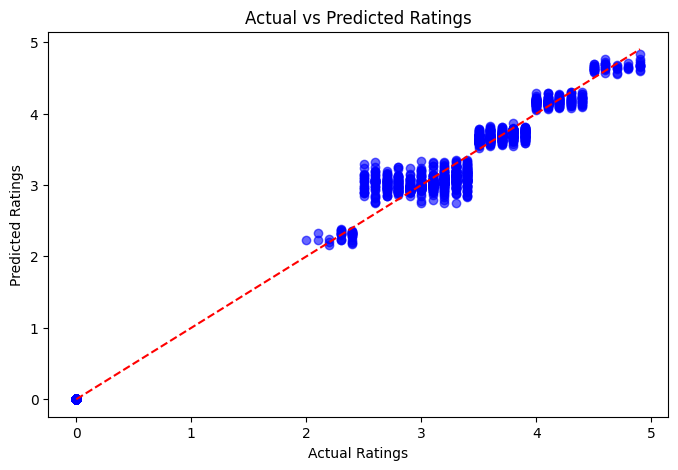

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()


In [54]:
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importance:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Feature Importance:
Votes: 0.9000
Rating color: 0.0837
Rating text: 0.0052
Latitude: 0.0021
Longitude: 0.0020
Restaurant Name: 0.0019
Cuisines: 0.0017
Locality: 0.0014
Average Cost for two: 0.0011
Has Online delivery: 0.0003
City: 0.0002
Price range: 0.0002
Has Table booking: 0.0001
Currency: 0.0000
Is delivering now: 0.0000
Country Code: 0.0000
Switch to order menu: 0.0000
